## Introduction

The [GTZAN dataset](https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification) is one of the most popular datasets used for music genre classification. It contains audio files from 10 different genres, each having 100 audio files of 30 seconds duration. The dataset has been widely used in machine learning and audio signal processing for testing various algorithms for music genre recognition.

The dataset also includes two CSV files containing features extracted from the audio files. One file has features calculated over the entire 30-second duration of each song, while the other has features calculated over 3-second segments of each song.

In this notebook, we will perform extensive exploratory data analysis (EDA) on this dataset to understand the distributions of various features, identify any potential outliers or anomalies, and gain insights that could be helpful for building machine learning models for music genre classification. We will also analyze the spectrogram images associated with each audio file.

In [1]:
# Install the Kaggle API client
!pip install kaggle

# Upload your Kaggle API credentials (kaggle.json) file
from google.colab import files
files.upload()

# Move the Kaggle API key to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the GTZAN dataset
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification

# Unzip the downloaded dataset
!unzip gtzan-dataset-music-genre-classification.zip

Saving kaggle.json to kaggle.json
100% 1.21G/1.21G [00:17<00:00, 128MB/s] 
100% 1.21G/1.21G [00:17<00:00, 74.5MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_original/blues/blues.00011.wav  
  inflating: Data/genres_original/blues/blues.00012.wa

## Initial Setup
First, we need to set up our environment by installing necessary libraries and loading the dataset.

In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

DATASET_DIR = 'Data'

# Setting up visualization parameters
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load the datasets
features_3_sec = pd.read_csv(os.path.join(DATASET_DIR, 'features_3_sec.csv'))
features_30_sec = pd.read_csv(os.path.join(DATASET_DIR, 'features_30_sec.csv'))

## Basic Data Overview

### Overview of features_3_sec.csv

In [3]:
print("First few rows of the dataset:")
display(features_3_sec.head())

First few rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [4]:
print("\nSummary Statistics:")
display(features_3_sec.describe())


Summary Statistics:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,9990.0,9990.000000,9990.000000,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,9.990000e+03,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,66149.0,0.379534,0.084876,0.130859,2.676388e-03,2199.219431,4.166727e+05,2241.385959,1.182711e+05,4566.076592,...,1.448240,49.988755,-4.198706,51.962753,0.739943,52.488851,-2.497306,54.973829,-0.917584,57.322614
std,0.0,0.090466,0.009637,0.068545,3.585628e-03,751.860611,4.349644e+05,543.854449,1.013505e+05,1642.065335,...,5.735149,34.442816,5.677379,36.400669,5.181313,38.177120,5.111799,41.585677,5.253243,46.444212
min,66149.0,0.107108,0.015345,0.000953,4.379535e-08,472.741636,8.118813e+02,499.162910,1.183520e+03,658.336276,...,-26.850016,1.325786,-27.809795,1.624544,-20.733809,3.437439,-27.448456,3.065302,-35.640659,0.282131
25%,66149.0,0.315698,0.079833,0.083782,6.145900e-04,1630.680158,1.231961e+05,1887.455790,4.876553e+04,3378.311110,...,-2.227478,29.584894,-7.951722,29.863448,-2.516638,29.636197,-5.734123,30.496412,-4.004475,30.011365
50%,66149.0,0.384741,0.085108,0.121253,1.491318e-03,2208.628236,2.650692e+05,2230.575595,8.996072e+04,4631.377892,...,1.461623,41.702393,-4.443021,42.393583,0.733772,41.831377,-2.702366,43.435253,-1.030939,44.332155
75%,66149.0,0.442443,0.091092,0.176328,3.130862e-03,2712.581884,5.624152e+05,2588.340505,1.585674e+05,5591.634521,...,5.149752,59.274619,-0.726945,61.676964,3.888734,62.033906,0.514246,65.328602,2.216603,68.210421
max,66149.0,0.749481,0.120964,0.442567,3.261522e-02,5432.534406,4.794119e+06,3708.147554,1.235143e+06,9487.446477,...,39.144405,683.932556,34.048843,529.363342,36.970322,629.729797,31.365425,1143.230591,34.212101,910.473206


In [5]:
print("\nData Types and Missing Values:")
display(features_3_sec.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float

None

In [6]:
duplicate_rows = features_3_sec[features_3_sec.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows.shape[0]}")


Number of duplicate rows: 0


### Overview of features_30_sec.csv

In [7]:
print("First few rows of the dataset:")
display(features_30_sec.head())

First few rows of the dataset:


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [8]:
print("\nSummary Statistics:")
display(features_30_sec.describe())


Summary Statistics:


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,662030.846000,0.378682,0.086340,0.130930,0.003051,2201.780898,4.696916e+05,2242.541070,137079.155165,4571.549304,...,1.148144,60.730958,-3.966028,62.633624,0.507696,63.712586,-2.328761,66.231930,-1.095348,70.126096
std,1784.073992,0.081705,0.007735,0.065683,0.003634,715.960600,4.008995e+05,526.316473,96455.666326,1574.791602,...,4.578948,33.781951,4.549697,33.479172,3.869105,34.401977,3.755957,37.174631,3.837007,45.228512
min,660000.000000,0.171939,0.044555,0.005276,0.000004,570.040355,7.911251e+03,898.066208,10787.185064,749.140636,...,-15.693844,9.169314,-17.234728,13.931521,-11.963694,15.420555,-18.501955,13.487622,-19.929634,7.956583
25%,661504.000000,0.319562,0.082298,0.086657,0.000942,1627.697311,1.843505e+05,1907.240605,67376.554428,3380.069642,...,-1.863280,40.376442,-7.207225,40.830875,-2.007015,41.884240,-4.662925,41.710184,-3.368996,42.372865
50%,661794.000000,0.383148,0.086615,0.122443,0.001816,2209.263090,3.384862e+05,2221.392843,111977.548036,4658.524473,...,1.212809,52.325077,-4.065605,54.717674,0.669643,54.804890,-2.393862,57.423059,-1.166289,59.186117
75%,661794.000000,0.435942,0.091256,0.175682,0.003577,2691.294667,6.121479e+05,2578.469836,182371.576801,5533.810460,...,4.359662,71.691755,-0.838737,75.040838,3.119212,75.385832,0.150573,78.626444,1.312615,85.375374
max,675808.000000,0.663685,0.108111,0.397973,0.027679,4435.243901,3.036843e+06,3509.646417,694784.811549,8677.672688,...,13.457150,392.932373,11.482946,406.058868,15.388390,332.905426,14.694924,393.161987,15.369627,506.065155


In [9]:
print("\nData Types and Missing Values:")
display(features_30_sec.info())


Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float6

None

In [10]:
duplicate_rows_30_sec = features_30_sec[features_30_sec.duplicated()]
print(f"\nNumber of duplicate rows: {duplicate_rows_30_sec.shape[0]}")


Number of duplicate rows: 0


### Audio Exploration

In [ ]:
import IPython.display as ipd

# Path to the genres_original folder
AUDIO_PATH = os.path.join(DATASET_DIR, 'genres_original')

# Displaying and playing a short clip from an audio file of each genre
for genre in os.listdir(AUDIO_PATH):
    genre_folder = os.path.join(AUDIO_PATH, genre)
    audio_file = os.listdir(genre_folder)[0]
    audio_file_path = os.path.join(genre_folder, audio_file)
    print(f"\nGenre: {genre}")
    display(ipd.Audio(audio_file_path, rate=22050))

## Audio analysis

In [12]:
import librosa.display
import matplotlib.pyplot as plt
import librosa

# Path to the genres_original folder
AUDIO_PATH = os.path.join(DATASET_DIR, 'genres_original')

for genre in os.listdir(AUDIO_PATH):
    genre_folder = os.path.join(AUDIO_PATH, genre)
    audio_file = os.listdir(genre_folder)[0]  # Taking the first audio file of each genre
    audio_file_path = os.path.join(genre_folder, audio_file)

    # Load the audio file
    y, sr = librosa.load(audio_file_path)

    # Create the 2D waveform plot
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f"2D Waveform - Genre: {genre}")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")

    # Create the spectrogram
    plt.subplot(1, 2, 2)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f"Spectrogram - Genre: {genre}")

    plt.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Distribution Analysis

### Histograms for features in features_3_sec.csv

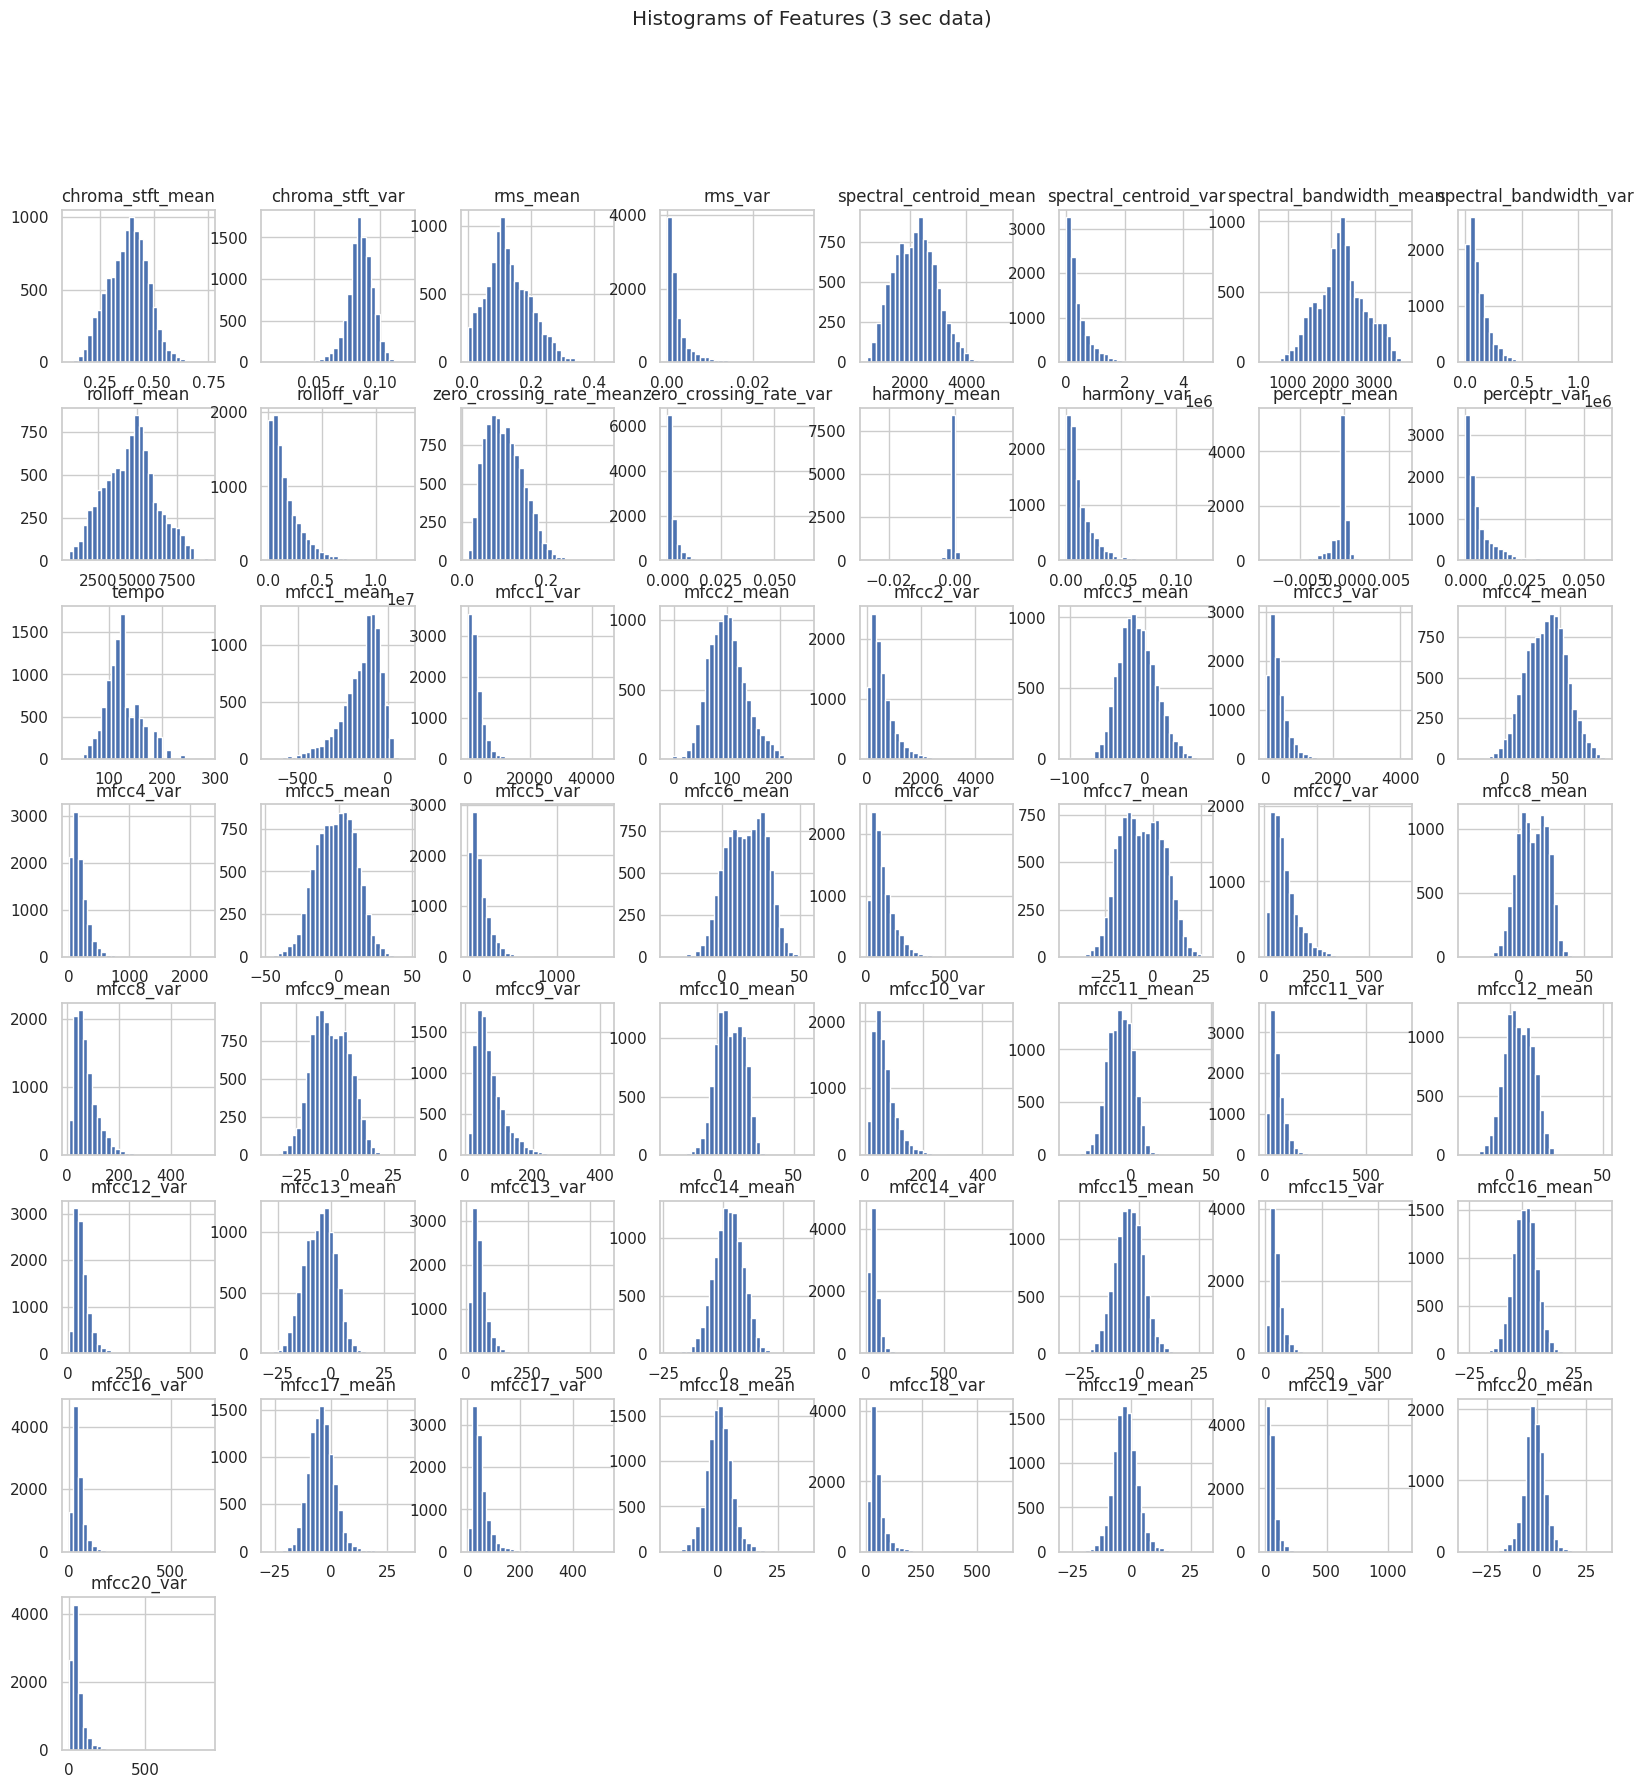

In [13]:
features_3_sec.drop(['filename', 'length', 'label'], axis=1).hist(bins=30, figsize=(20, 20))
plt.suptitle('Histograms of Features (3 sec data)')
plt.show()

### Histograms for features in features_30_sec.csv

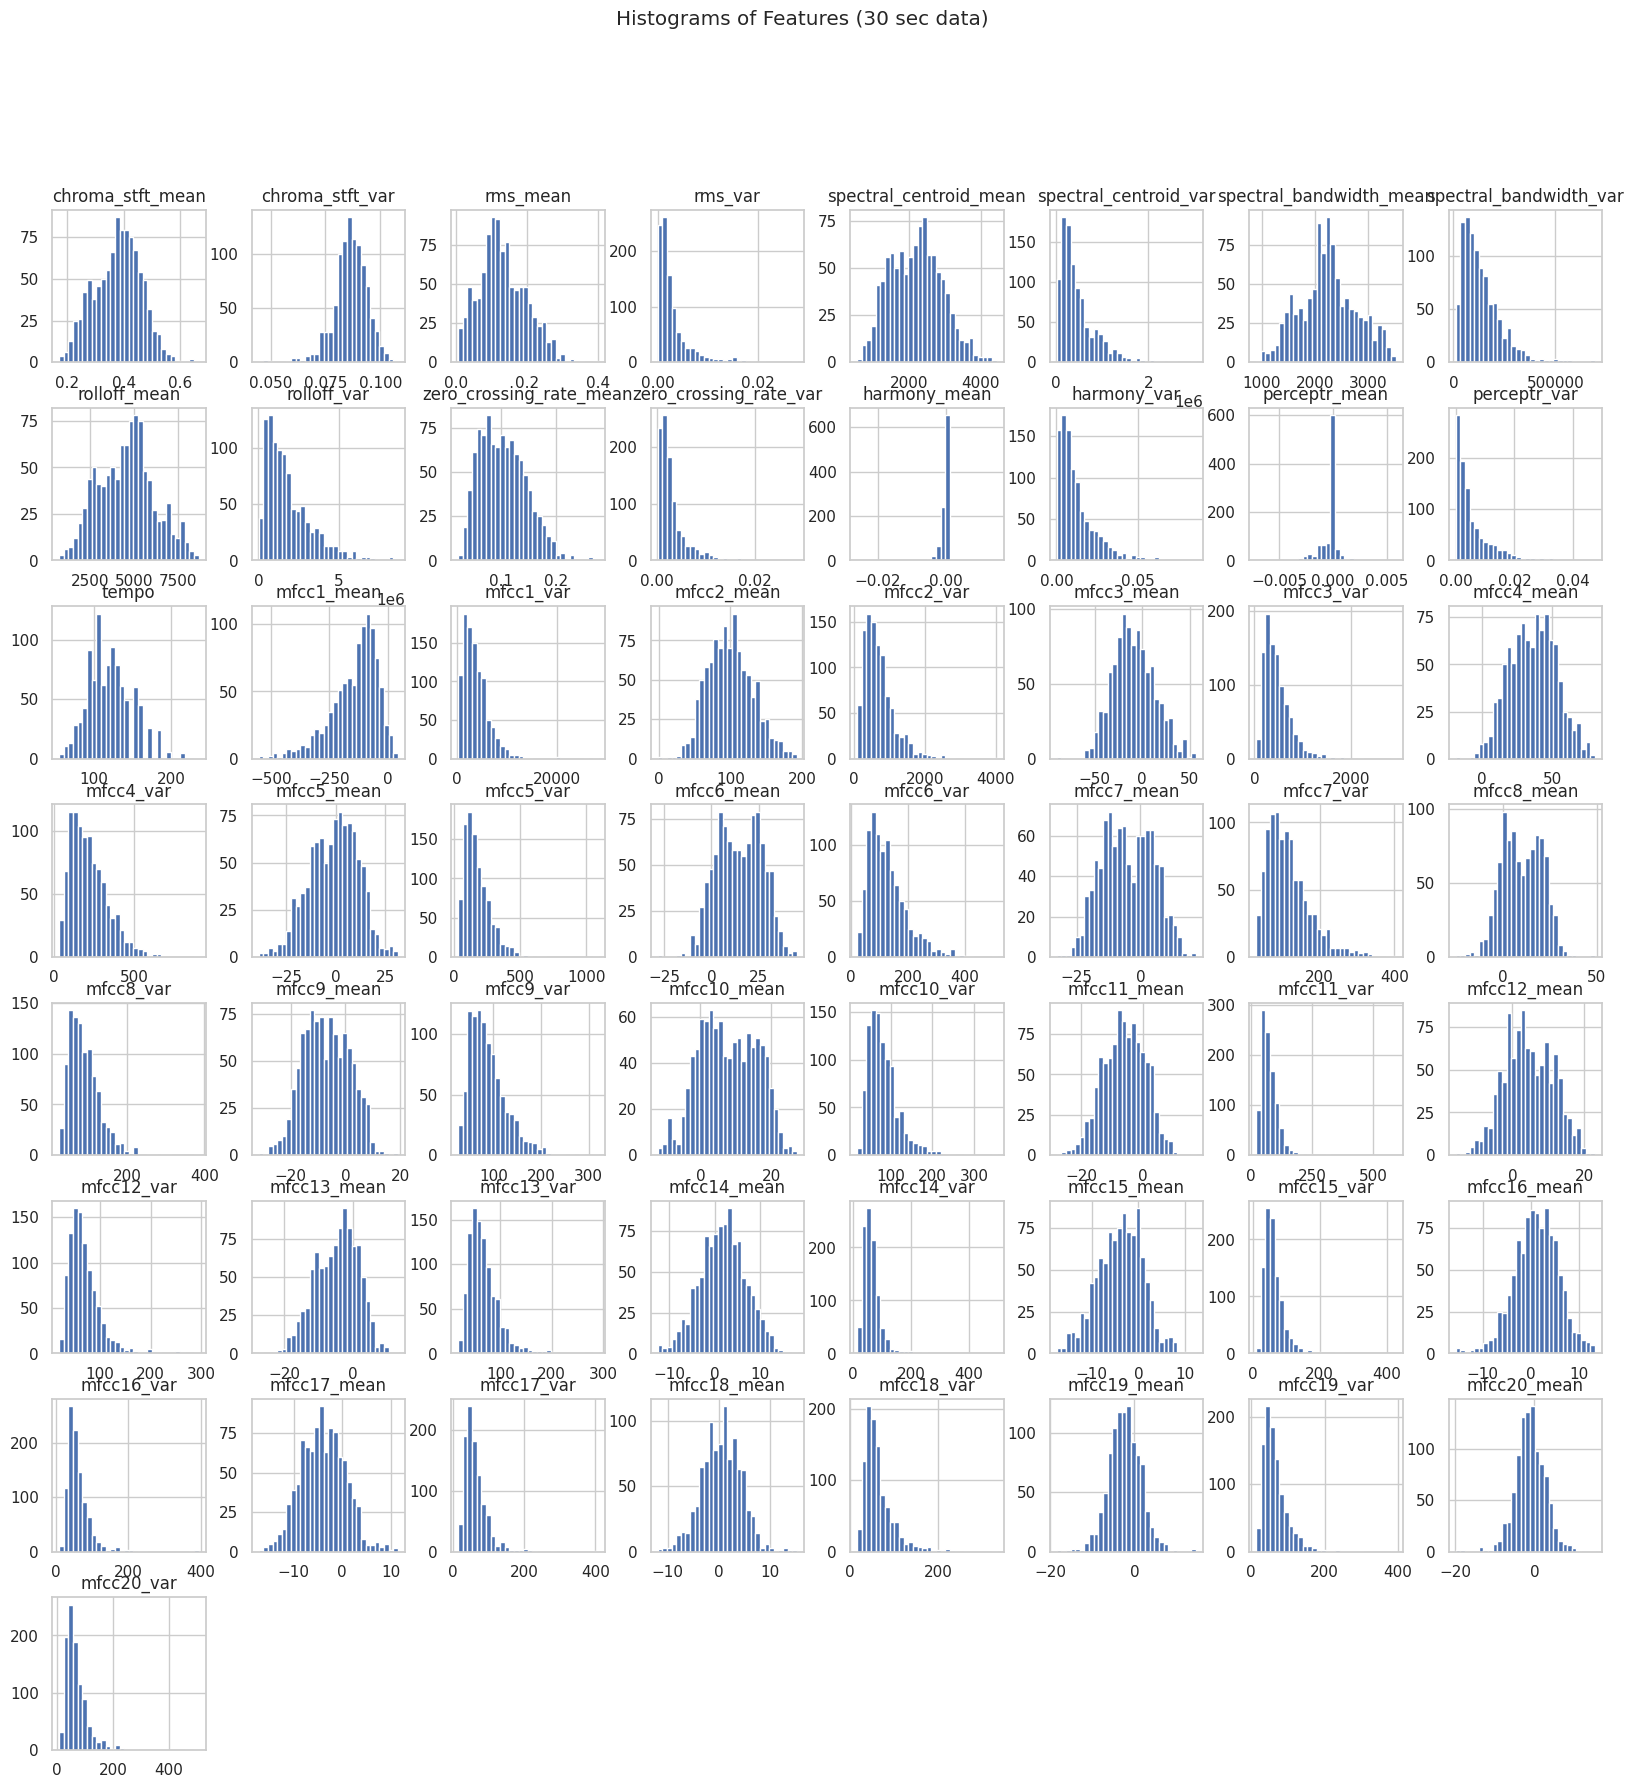

In [14]:
features_30_sec.drop(['filename', 'length', 'label'], axis=1).hist(bins=30, figsize=(20, 20))
plt.suptitle('Histograms of Features (30 sec data)')
plt.show()

### Box plots for features in features_3_sec.csv

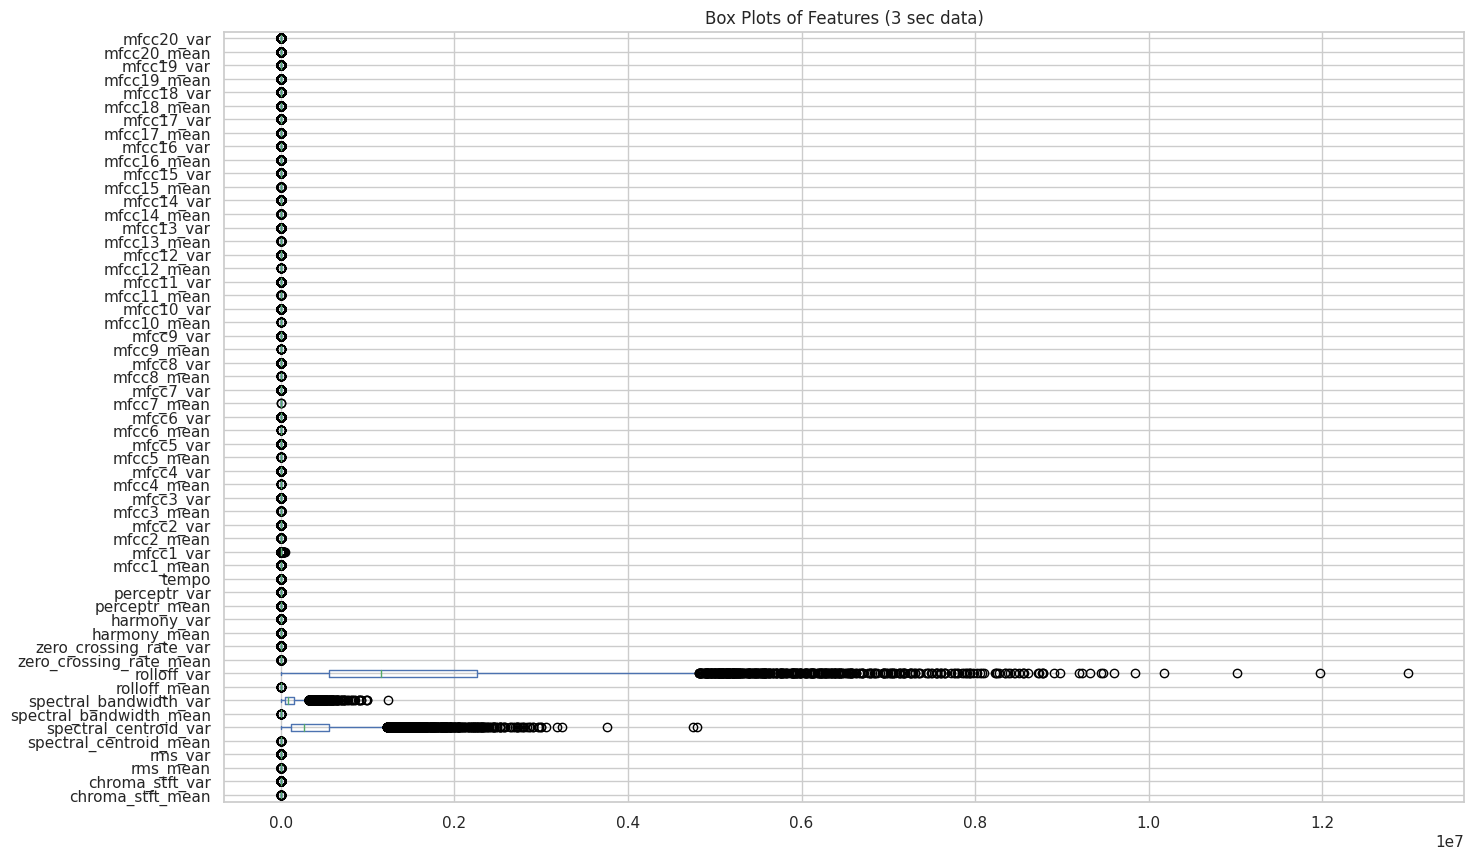

In [15]:
features_3_sec.drop(['filename', 'length', 'label'], axis=1).plot(kind='box', vert=False, figsize=(16, 10))
plt.title('Box Plots of Features (3 sec data)')
plt.show()

### Box plots for features in features_30_sec.csv

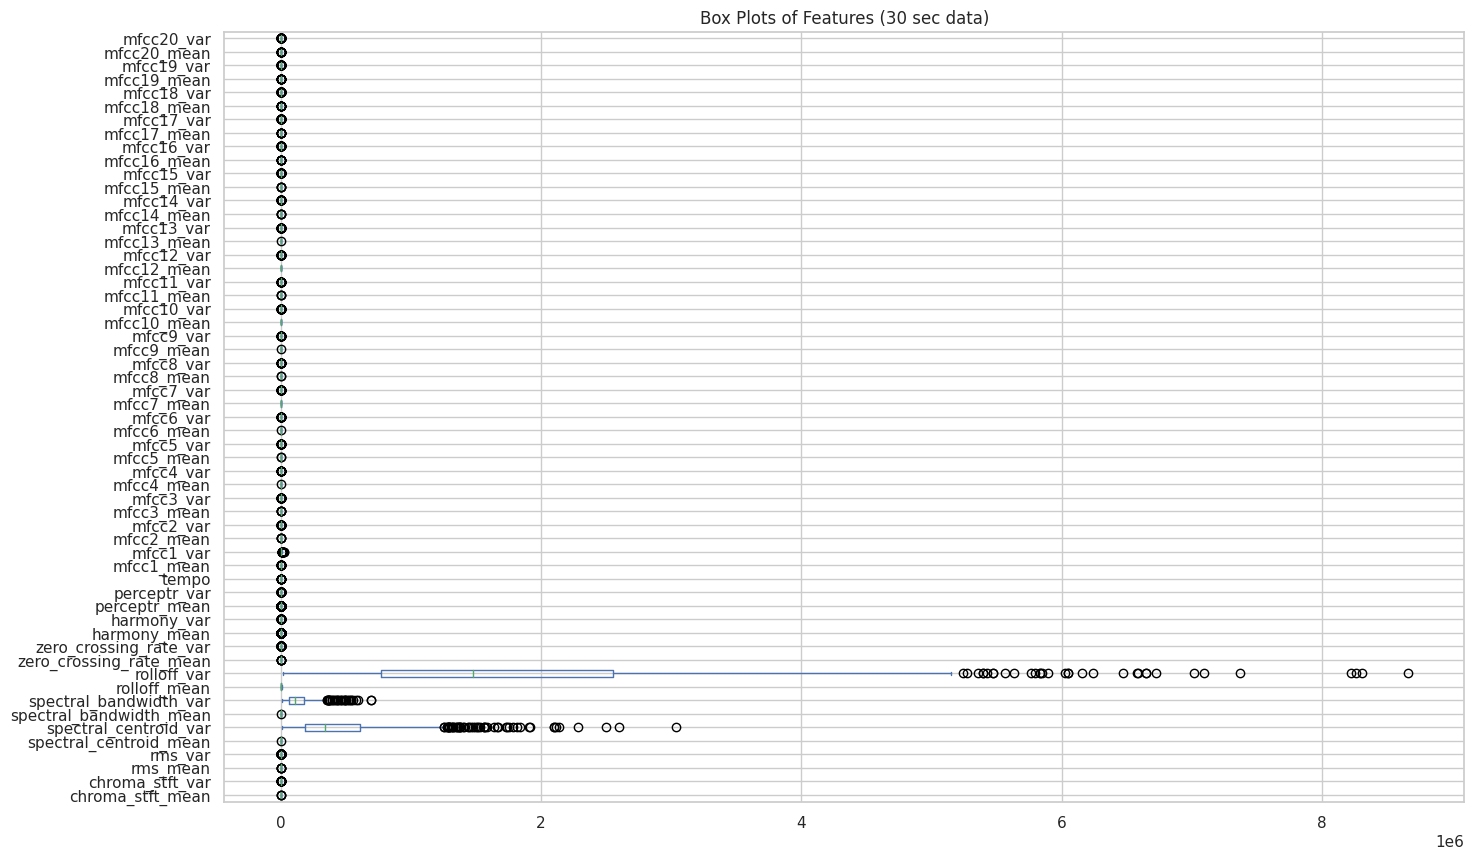

In [16]:
features_30_sec.drop(['filename', 'length', 'label'], axis=1).plot(kind='box', vert=False, figsize=(16, 10))
plt.title('Box Plots of Features (30 sec data)')
plt.show()

## Correlation Analysis

### Correlation matrix for features_3_sec.csv

In [17]:
corr_matrix_3_sec = features_3_sec.drop(['filename', 'length'], axis=1).corr()
plt.figure(figsize=(60, 60))
sns.heatmap(corr_matrix_3_sec, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (3 sec data)')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

### Correlation matrix for features_30_sec.csv

In [ ]:
corr_matrix_30_sec = features_30_sec.drop(['filename', 'length'], axis=1).corr()
plt.figure(figsize=(60, 60))
sns.heatmap(corr_matrix_30_sec, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (30 sec data)')
plt.show()

## Genre Analysis

### Distribution of songs across genres in features_3_sec.csv

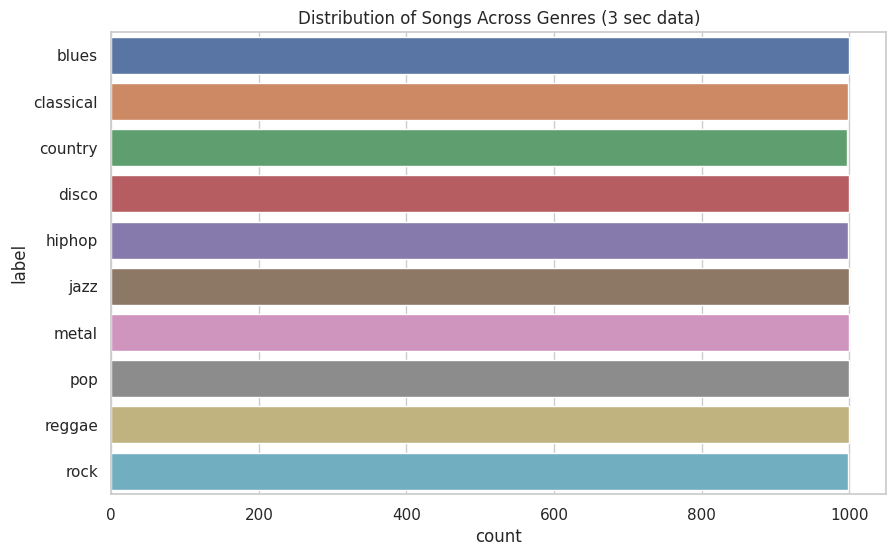

In [18]:
sns.countplot(y='label', data=features_3_sec)
plt.title('Distribution of Songs Across Genres (3 sec data)')
plt.show()

### Distribution of songs across genres in features_30_sec.csv

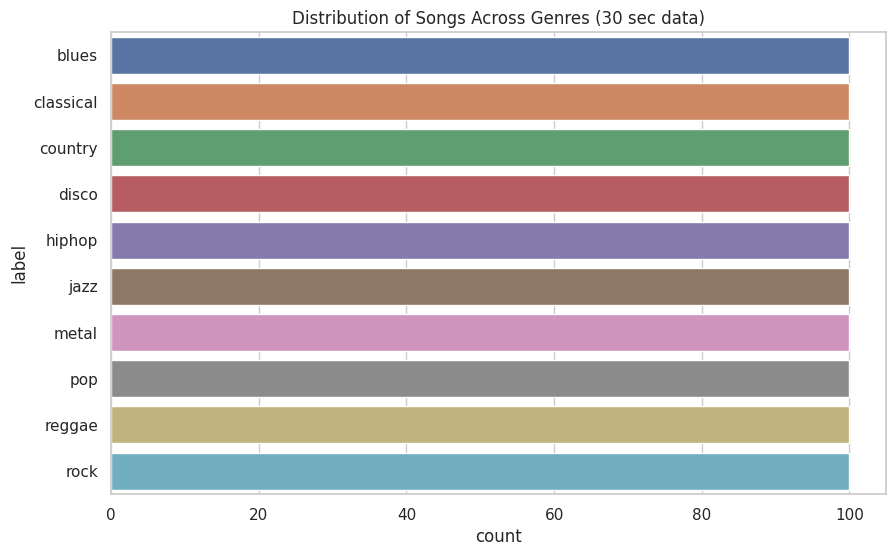

In [19]:
sns.countplot(y='label', data=features_30_sec)
plt.title('Distribution of Songs Across Genres (30 sec data)')
plt.show()

### Mean of features across genres in features_3_sec.csv

In [20]:
mean_features_3_sec = features_3_sec.groupby('label').mean()
print("Mean of Features Across Genres (3 sec data):")
display(mean_features_3_sec)

Mean of Features Across Genres (3 sec data):


<ipython-input-20-1ed0367720f9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_features_3_sec = features_3_sec.groupby('label').mean()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,66149.0,0.342438,0.089851,0.136025,0.002624,1726.067889,245598.219597,1930.849650,95125.688781,3632.913078,...,0.738590,54.161615,-7.628242,55.628034,-1.052426,57.308816,-3.878884,59.144771,-2.527042,61.892176
classical,66149.0,0.264508,0.083363,0.042812,0.000403,1351.320102,70830.230588,1519.531577,47788.745702,2475.817622,...,1.520216,53.650671,-0.181774,55.738733,0.828762,57.036661,-1.210227,65.911659,-0.980228,77.626622
country,66149.0,0.344996,0.085352,0.125690,0.001372,1891.187623,328737.761268,2096.407344,127052.895225,3938.471613,...,-0.107398,48.072962,-5.821965,50.095858,-0.141678,46.798748,-2.967412,46.554044,-2.885829,49.494789
disco,66149.0,0.416377,0.083408,0.136209,0.002739,2617.284955,466543.484993,2512.355778,125423.252300,5514.648263,...,1.449759,44.695489,-4.483338,46.476756,1.318948,48.690361,-3.097415,51.068843,0.652601,51.748709
hiphop,66149.0,0.454590,0.086815,0.178219,0.006656,2521.518383,703894.964226,2512.284466,153455.068676,5327.690463,...,2.755063,51.705992,-3.091336,54.336631,1.521220,52.341174,-1.844438,53.078386,-0.680143,55.615884
jazz,66149.0,0.297520,0.088027,0.086641,0.001195,1790.281688,206724.008047,2019.764282,89887.795060,3744.724733,...,0.905286,57.565069,-1.783814,59.237994,-0.640314,64.513396,-1.374468,71.400835,-1.857287,76.779319
metal,66149.0,0.480162,0.072370,0.153454,0.001060,2600.881732,183577.335324,2242.819811,58359.357255,5123.753216,...,5.801267,34.106649,-8.284396,35.894936,3.206265,33.639106,-5.025991,34.254769,1.561031,30.856026
pop,66149.0,0.398089,0.087688,0.199640,0.006491,3069.993025,876099.976738,3006.802982,158980.660376,6647.631499,...,-0.961011,63.152282,-0.362038,66.105618,0.532565,69.844734,0.855289,72.484452,0.319481,72.300219
reggae,66149.0,0.408984,0.089314,0.122433,0.002875,2182.213624,708041.299117,2309.796710,207941.221203,4586.938330,...,1.157193,54.571538,-3.772454,55.536601,1.203878,52.638618,-2.257146,53.727534,-1.487579,55.024500


### Mean of features across genres in features_30_sec.csv

In [21]:
mean_features_30_sec = features_30_sec.groupby('label').mean()
print("Mean of Features Across Genres (30 sec data):")
display(mean_features_30_sec)

Mean of Features Across Genres (30 sec data):


<ipython-input-21-2ea9edb8a8a3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_features_30_sec = features_30_sec.groupby('label').mean()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,661794.00,0.341429,0.090700,0.136067,0.003015,1727.584661,289738.903099,1931.447105,113632.662376,3636.877154,...,0.193491,64.327187,-7.217955,64.982897,-1.448949,67.494990,-3.606209,68.857226,-2.793275,70.309525
classical,662116.10,0.263542,0.085117,0.042920,0.000706,1353.878837,123433.708255,1521.709862,82450.128596,2482.325982,...,1.044787,76.558489,0.176529,77.055251,0.571998,80.744419,-1.065244,94.390691,-1.066748,114.119585
country,662027.76,0.343812,0.086471,0.125988,0.001726,1896.210622,375603.751882,2099.535390,145431.565441,3949.577166,...,-0.388173,58.811919,-5.618285,61.268125,-0.365908,59.394237,-2.816718,56.763077,-3.055206,61.019813
disco,661934.80,0.415643,0.084668,0.136296,0.002895,2619.852229,498543.826654,2513.251591,133819.522275,5519.791820,...,1.243687,51.066385,-4.326491,53.473215,1.130248,56.773737,-2.960387,59.002601,0.480941,60.454717
hiphop,663468.24,0.454319,0.088285,0.178344,0.007279,2524.518523,769122.746369,2513.452483,174018.893731,5333.623851,...,2.596768,56.658187,-2.960372,60.599478,1.384509,58.212162,-1.739940,59.759810,-0.806001,62.580393
jazz,662233.28,0.296643,0.089909,0.086648,0.001455,1792.360097,271372.514673,2021.001244,110450.414117,3750.174280,...,0.487133,81.236784,-1.453946,80.678183,-0.955960,83.478559,-1.144374,90.736064,-2.088557,101.477950
metal,661596.80,0.479235,0.074208,0.153478,0.001308,2602.181204,216061.696329,2242.538687,68989.534738,5125.230255,...,5.450559,39.008028,-7.969246,40.202777,2.885922,38.940272,-4.740642,38.016470,1.264175,34.358525
pop,661504.00,0.397632,0.089429,0.199734,0.007292,3073.549538,957036.816712,3008.195592,183446.721734,6654.772975,...,-0.972551,74.938113,-0.375791,78.074702,0.526494,83.124934,0.847990,84.657185,0.307300,84.295304
reggae,661622.90,0.408247,0.090597,0.122503,0.003132,2185.016755,772150.822191,2311.453709,222063.366304,4593.939352,...,0.976151,59.484003,-3.641866,61.487863,1.054487,57.929388,-2.160267,59.887746,-1.607359,62.892397


### Variance of features across genres in features_3_sec.csv

In [22]:
variance_features_3_sec = features_3_sec.groupby('label').var()
print("\nVariance of Features Across Genres (3 sec data):")
display(variance_features_3_sec)


Variance of Features Across Genres (3 sec data):


<ipython-input-22-78333b605e92>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_features_3_sec = features_3_sec.groupby('label').var()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,0.0,0.004342,0.000063,0.003079,5.031405e-06,307556.574571,4.988568e+10,126840.271192,5.241483e+09,1.566751e+06,...,51.837626,1041.662921,26.311716,1362.253859,30.666319,1517.443693,31.863123,1351.151369,36.543461,1916.111365
classical,0.0,0.003888,0.000032,0.001644,5.566289e-07,170515.056007,1.256640e+10,97064.834563,4.307545e+09,7.900092e+05,...,44.994464,2211.852916,37.965139,2394.708947,40.511184,2162.389842,41.723354,3765.217523,50.762687,5216.225960
country,0.0,0.003002,0.000042,0.002742,9.828245e-07,373805.643284,7.323636e+10,214079.349570,5.989899e+09,1.864999e+06,...,33.531367,579.997927,24.543967,727.913029,31.902767,798.668492,20.657639,721.204191,22.457070,1111.838005
disco,0.0,0.003494,0.000064,0.002037,4.271901e-06,260336.303259,1.060752e+11,135451.521974,9.817915e+09,1.187604e+06,...,20.832070,543.351890,23.718711,740.639334,21.304179,766.485232,19.670532,786.252490,19.258419,833.017389
hiphop,0.0,0.003586,0.000095,0.004220,3.565394e-05,294001.303936,2.792174e+11,140416.055027,1.306321e+10,1.239634e+06,...,23.429236,593.540868,14.629491,855.358028,22.999651,927.106376,18.697385,1030.318353,20.099457,1254.176982
jazz,0.0,0.004902,0.000049,0.002339,1.807196e-06,522763.837275,4.813502e+10,339596.613034,4.511221e+09,2.672416e+06,...,46.465587,2218.057721,36.877135,2267.433320,29.698154,2858.186602,31.230533,3917.093678,37.705408,4707.299283
metal,0.0,0.004535,0.000117,0.004337,1.141528e-06,167554.225808,2.156870e+10,50822.919205,2.160928e+09,5.064385e+05,...,14.824949,337.749414,12.236610,638.599314,13.777675,451.706861,16.475400,375.856786,18.221104,227.692301
pop,0.0,0.004946,0.000078,0.004169,2.657683e-05,418367.771856,3.036008e+11,124867.314355,1.028555e+10,1.814478e+06,...,24.645316,2553.232202,24.432419,2151.982386,25.295229,2411.358415,19.566324,2471.440296,19.762300,2426.474197
reggae,0.0,0.004714,0.000090,0.002817,7.235706e-06,454976.098023,2.435413e+11,166177.970805,1.421398e+10,1.649184e+06,...,18.594502,571.323358,21.346051,847.911917,17.724047,848.472354,14.515322,745.664978,17.292367,986.875835


### Variance of features across genres in features_30_sec.csv

In [23]:
variance_features_30_sec = features_30_sec.groupby('label').var()
print("\nVariance of Features Across Genres (30 sec data):")
display(variance_features_30_sec)


Variance of Features Across Genres (30 sec data):


<ipython-input-23-881b524356b9>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.var is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  variance_features_30_sec = features_30_sec.groupby('label').var()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,0.000000e+00,0.003413,0.000044,0.002702,3.584822e-06,265767.212590,3.126788e+10,109041.528916,5.916887e+09,1.347112e+06,...,41.994123,762.801823,16.679911,805.085674,19.741756,1112.274986,21.606499,909.525411,28.081471,960.829767
classical,2.507942e+06,0.001944,0.000010,0.001356,7.245722e-07,121218.357471,1.027544e+10,64635.962708,5.949429e+09,5.640221e+05,...,18.762668,1198.942557,17.531417,1182.715842,14.874032,1563.791597,12.049942,2456.799455,14.594143,4159.780582
country,1.415890e+06,0.001675,0.000020,0.002420,8.736489e-07,331675.590007,4.139992e+10,198273.208774,4.272832e+09,1.672433e+06,...,21.681604,365.848477,12.208769,455.960837,18.519778,634.818714,9.942624,432.514947,11.041409,744.192136
disco,1.580856e+06,0.002220,0.000036,0.001875,4.231838e-06,229256.107217,6.056833e+10,127804.020112,7.485700e+09,1.081153e+06,...,13.540355,351.688875,16.239327,446.757916,12.459150,527.218956,11.420805,432.667575,10.165399,489.073064
hiphop,1.919093e+07,0.002218,0.000055,0.003587,3.655030e-05,229715.525257,2.015241e+11,120546.324792,1.311052e+10,1.009924e+06,...,17.605321,399.760336,8.072061,624.341806,16.588669,687.851462,12.029356,971.207403,13.001972,1100.344769
jazz,2.877628e+06,0.002967,0.000024,0.002092,1.752107e-06,463272.387031,7.002714e+10,321989.043423,4.328559e+09,2.421458e+06,...,19.940480,3632.818535,14.309751,3001.437061,10.043777,2284.136553,11.545589,3007.354834,12.797839,5110.897705
metal,1.848501e+04,0.002678,0.000071,0.004118,1.698606e-06,135841.237012,1.469548e+10,40532.112749,1.910401e+09,3.994685e+05,...,10.062492,184.924780,7.697213,375.896408,8.439733,242.850386,12.205527,189.044823,14.832099,118.918039
pop,0.000000e+00,0.003260,0.000033,0.003364,2.349287e-05,338865.161928,1.769527e+11,100454.882946,7.285310e+09,1.498241e+06,...,13.005618,2312.962915,12.746241,1691.899166,12.350204,1723.986564,7.628997,1483.178126,8.110810,1539.666457
reggae,2.054928e+04,0.003500,0.000048,0.002567,7.686060e-06,392622.935380,2.309419e+11,152650.219054,1.062373e+10,1.433673e+06,...,13.454336,302.271128,14.359298,565.352362,11.899630,482.603599,7.655265,439.116279,9.413224,696.046542


## Feature Importance Analysis

In this section, we will use a Random Forest Classifier to evaluate the importance of different features in predicting the music genre. This analysis will provide insights into which features are most influential in the classification task

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### For `features_3_sec.csv`



Accuracy (3 sec data): 0.8813813813813813


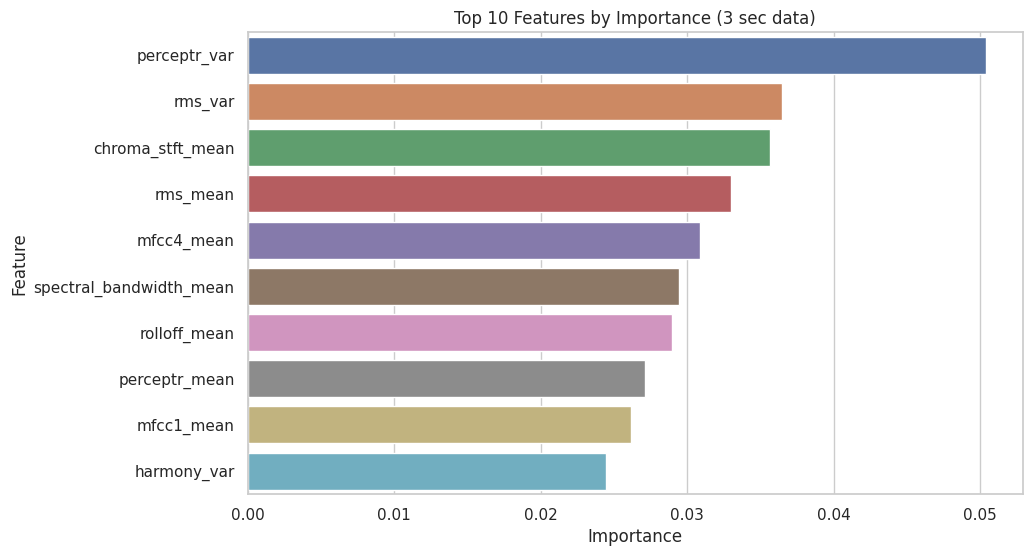

In [25]:
X = features_3_sec.drop(['filename', 'label'], axis=1)
y = features_3_sec['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_3_sec = RandomForestClassifier(n_estimators=100, random_state=42)
rf_3_sec.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_3_sec.predict(X_test)
accuracy_3_sec = accuracy_score(y_test, y_pred)
print("Accuracy (3 sec data):", accuracy_3_sec)

# Feature importances
feature_importances_3_sec = rf_3_sec.feature_importances_
features_3_sec_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_3_sec})
features_3_sec_df = features_3_sec_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting the top 10 features based on importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_3_sec_df.head(10))
plt.title('Top 10 Features by Importance (3 sec data)')
plt.show()


### For `features_30_sec.csv`

Accuracy (30 sec data): 0.76


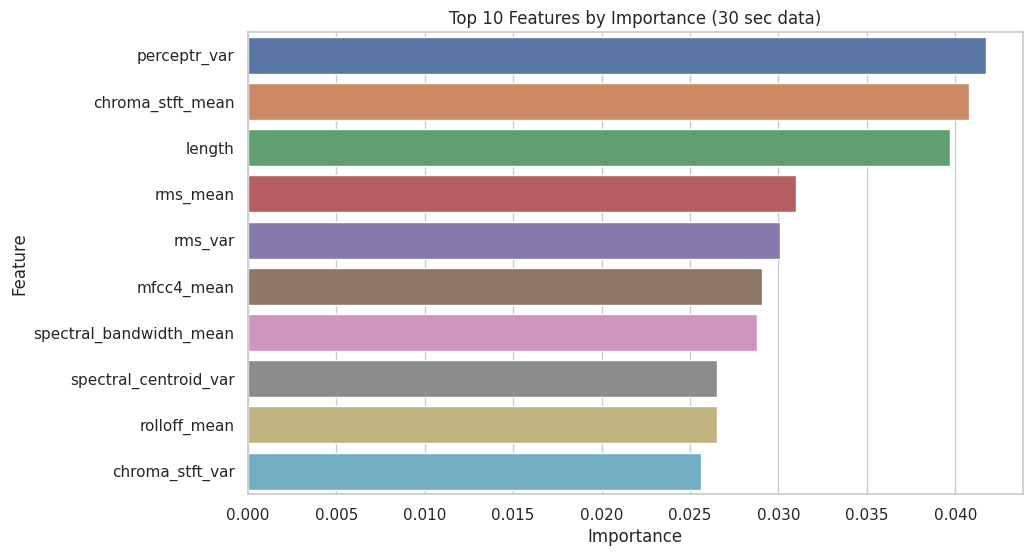

In [26]:
X_30_sec = features_30_sec.drop(['filename', 'label'], axis=1)
y_30_sec = features_30_sec['label']
X_train_30_sec, X_test_30_sec, y_train_30_sec, y_test_30_sec = train_test_split(X_30_sec, y_30_sec, test_size=0.2, random_state=42)

rf_30_sec = RandomForestClassifier(n_estimators=100, random_state=42)
rf_30_sec.fit(X_train_30_sec, y_train_30_sec)

# Predictions and evaluation
y_pred_30_sec = rf_30_sec.predict(X_test_30_sec)
accuracy_30_sec = accuracy_score(y_test_30_sec, y_pred_30_sec)
print("Accuracy (30 sec data):", accuracy_30_sec)

# Feature importances
feature_importances_30_sec = rf_30_sec.feature_importances_
features_30_sec_df = pd.DataFrame({'Feature': X_30_sec.columns, 'Importance': feature_importances_30_sec})
features_30_sec_df = features_30_sec_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Plotting the top 10 features based on importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_30_sec_df.head(10))
plt.title('Top 10 Features by Importance (30 sec data)')
plt.show()

## Images

### A Few Spectrogram Images from Different Genres

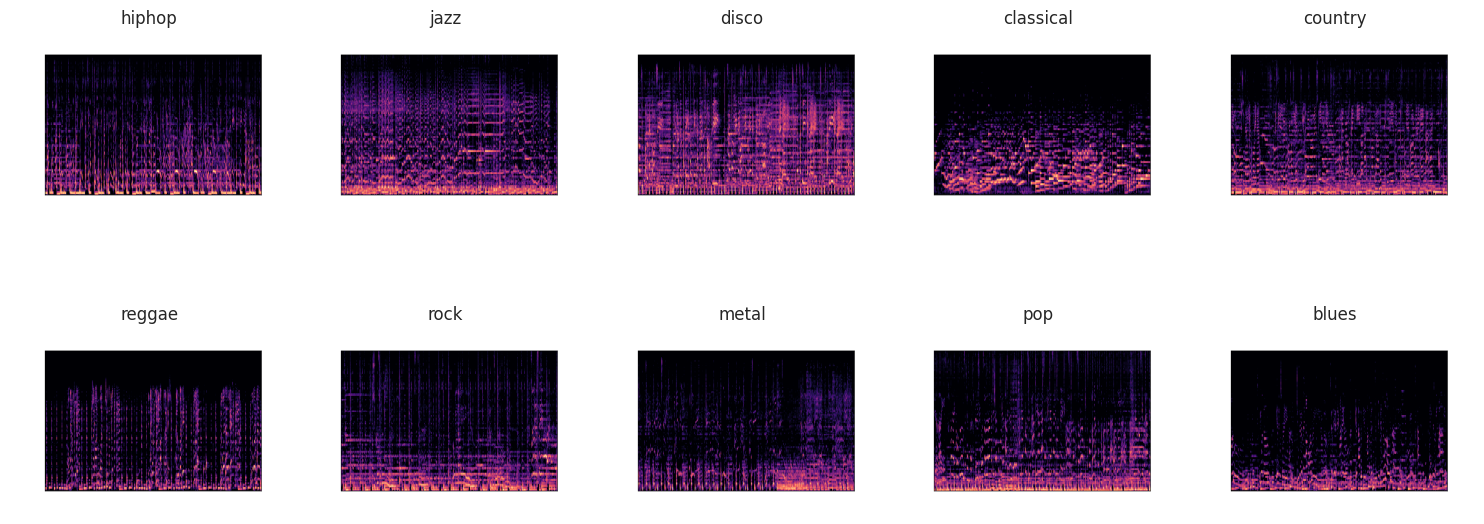

In [27]:
from PIL import Image
import matplotlib.pyplot as plt

IMAGES_PATH = os.path.join(DATASET_DIR, 'images_original')

# Displaying a few images from different genres
genres = os.listdir(IMAGES_PATH)
plt.figure(figsize=(15, 7))
for i, genre in enumerate(genres):
    genre_folder = os.path.join(IMAGES_PATH, genre)
    image_file = os.listdir(genre_folder)[0]  # Taking the first image of each genre
    image_path = os.path.join(genre_folder, image_file)
    img = Image.open(image_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(genre)
    plt.axis('off')
plt.tight_layout()
plt.show()

### Image Dimension Analysis

In [28]:
image_dimensions = {}
for genre in genres:
    genre_folder = os.path.join(IMAGES_PATH, genre)
    for image_file in os.listdir(genre_folder):
        image_path = os.path.join(genre_folder, image_file)
        img = Image.open(image_path)
        if genre not in image_dimensions:
            image_dimensions[genre] = []
        image_dimensions[genre].append(img.size)

# Display unique dimensions for each genre
for genre, dimensions in image_dimensions.items():
    unique_dimensions = set(dimensions)
    print(f"{genre}: {unique_dimensions}")

hiphop: {(432, 288)}
jazz: {(432, 288)}
disco: {(432, 288)}
classical: {(432, 288)}
country: {(432, 288)}
reggae: {(432, 288)}
rock: {(432, 288)}
metal: {(432, 288)}
pop: {(432, 288)}
blues: {(432, 288)}


## Insights and Conclusions

### Key Findings and Insights

-   __Equal Distribution of Music Genres__: The dataset contains an equal distribution of music tracks across different genres, ensuring a balanced dataset for training and evaluating machine learning models.
-   __No Duplicates__: There are no duplicate entries in the dataset, contributing to the quality and reliability of the data.
-   __Consistent Image Dimensions__: All spectrogram images are of the same size, providing consistency in visual representation.
-   __Diverse Feature Distributions__: The features extracted from the audio files show diverse distributions, highlighting the complexity and variability in music genres.
-   __Important Features Identified__: Through feature importance analysis using a Random Forest Classifier, we have identified the top features that play a crucial role in predicting music genres.

### Analysis of Top Features

From the Random Forest Classifier's feature importance analysis, we have identified the top 10 features that have the highest importance in predicting music genres in the dataset. Here is a brief analysis of these features:

1.  __perceptr_var (Importance: 0.0510)__: This feature represents the variance of the perceptual spectral flux. It is a measure of the rate at which the power spectrum of a signal is changing, which could be indicative of the rhythm or pace of the music.

2.  __rms_var (Importance: 0.0370)__: This feature represents the variance of the root mean square (RMS) value of the audio signal. RMS is a measure of the amplitude of the audio, and its variance could provide insights into the dynamic range of the music.

3.  __chroma_stft_mean (Importance: 0.0353)__: This feature represents the mean of the chroma short-time Fourier transform (STFT). Chroma features capture the harmonic and melodic content of the music, which can be crucial for genre classification.

4.  __spectral_bandwidth_mean (Importance: 0.0319)__: This feature represents the mean spectral bandwidth, which is a measure of the width of the spectrum. It can provide information about the timbral characteristics of the music.

5.  __rms_mean (Importance: 0.0314)__: Similar to rms_var, this feature represents the mean RMS value, providing insights into the average amplitude of the audio.

6.  __mfcc4_mean (Importance: 0.0310)__: This feature represents the mean of the fourth Mel-frequency cepstral coefficient (MFCC). MFCCs are commonly used in audio processing to capture the timbral and spectral characteristics of the audio.

7.  __mfcc1_mean (Importance: 0.0274)__: This feature represents the mean of the first MFCC, providing insights into the overall energy of the audio.

8.  __rolloff_mean (Importance: 0.0260)__: This feature represents the mean spectral rolloff point, which is the frequency below which a specified percentage of the total spectral energy lies.

9.  __perceptr_mean (Importance: 0.0256)__: This feature represents the mean perceptual spectral flux.

10. __harmony_var (Importance: 0.0249)__: This feature represents the variance of the harmonic elements in the audio, which can be indicative of the tonal characteristics of the music.

### Mean Features Across Genres

In [29]:
mean_features_3_sec = features_3_sec.groupby('label').mean()
mean_features_3_sec

<ipython-input-29-df8157c5d165>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_features_3_sec = features_3_sec.groupby('label').mean()


,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
label,,,,,,,,,,,,,,,,,,,,,
blues,66149.0,0.342438,0.089851,0.136025,0.002624,1726.067889,245598.219597,1930.849650,95125.688781,3632.913078,...,0.738590,54.161615,-7.628242,55.628034,-1.052426,57.308816,-3.878884,59.144771,-2.527042,61.892176
classical,66149.0,0.264508,0.083363,0.042812,0.000403,1351.320102,70830.230588,1519.531577,47788.745702,2475.817622,...,1.520216,53.650671,-0.181774,55.738733,0.828762,57.036661,-1.210227,65.911659,-0.980228,77.626622
country,66149.0,0.344996,0.085352,0.125690,0.001372,1891.187623,328737.761268,2096.407344,127052.895225,3938.471613,...,-0.107398,48.072962,-5.821965,50.095858,-0.141678,46.798748,-2.967412,46.554044,-2.885829,49.494789
disco,66149.0,0.416377,0.083408,0.136209,0.002739,2617.284955,466543.484993,2512.355778,125423.252300,5514.648263,...,1.449759,44.695489,-4.483338,46.476756,1.318948,48.690361,-3.097415,51.068843,0.652601,51.748709
hiphop,66149.0,0.454590,0.086815,0.178219,0.006656,2521.518383,703894.964226,2512.284466,153455.068676,5327.690463,...,2.755063,51.705992,-3.091336,54.336631,1.521220,52.341174,-1.844438,53.078386,-0.680143,55.615884
jazz,66149.0,0.297520,0.088027,0.086641,0.001195,1790.281688,206724.008047,2019.764282,89887.795060,3744.724733,...,0.905286,57.565069,-1.783814,59.237994,-0.640314,64.513396,-1.374468,71.400835,-1.857287,76.779319
metal,66149.0,0.480162,0.072370,0.153454,0.001060,2600.881732,183577.335324,2242.819811,58359.357255,5123.753216,...,5.801267,34.106649,-8.284396,35.894936,3.206265,33.639106,-5.025991,34.254769,1.561031,30.856026
pop,66149.0,0.398089,0.087688,0.199640,0.006491,3069.993025,876099.976738,3006.802982,158980.660376,6647.631499,...,-0.961011,63.152282,-0.362038,66.105618,0.532565,69.844734,0.855289,72.484452,0.319481,72.300219
reggae,66149.0,0.408984,0.089314,0.122433,0.002875,2182.213624,708041.299117,2309.796710,207941.221203,4586.938330,...,1.157193,54.571538,-3.772454,55.536601,1.203878,52.638618,-2.257146,53.727534,-1.487579,55.024500


#### The mean features across genres provide valuable insights into the unique characteristics of each music genre:

-  __Blues__: Shows moderate mean values across most features, with relatively lower values in spectral bandwidth and rolloff, indicating a smoother and less bright sound.

-  __Classical__: Has the lowest mean values in RMS (indicating lower loudness), spectral centroid (indicating a darker sound), and MFCCs, which is typical for classical music with its wide dynamic range and complex structures.

-  __Country__: Exhibits higher mean values in spectral centroid and rolloff, reflecting a brighter and sharper sound, which is characteristic of country music with its emphasis on vocals and high-pitched instruments.

-  __Disco__: Shows higher mean values in spectral centroid, bandwidth, rolloff, and several MFCCs, indicating a bright, rhythmic, and energetic sound, typical for disco music.

-  __Hip Hop__: Has the highest mean values in RMS, spectral centroid, and several MFCCs, reflecting a loud, bright, and bass-heavy sound, which is common in hip hop music.

-  __Jazz__: Exhibits moderate mean values with a slightly darker and smoother sound compared to other genres, which aligns with the typical characteristics of jazz music.

-  __Metal__: Shows the highest mean values in spectral centroid, bandwidth, and rolloff, indicating a very bright, sharp, and energetic sound, which is characteristic of metal music with its distorted guitars and fast-paced rhythms.

-  __Pop__: Has high mean values in RMS, spectral centroid, and several MFCCs, reflecting a loud, bright, and melodic sound, typical for pop music.

-  __Reggae__: Exhibits higher mean values in spectral centroid, bandwidth, and rolloff, indicating a brighter and sharper sound, which aligns with the rhythmic and energetic nature of reggae music.

- __Rock__: Shows higher mean values in spectral centroid, bandwidth, and rolloff, reflecting a bright, energetic, and rhythmic sound, typical for rock music.